In [1]:
# loading libraries
import os
import rasterio 
import numpy as np
import xarray as xr 
import pandas as pd
import geopandas as gpd 
import rioxarray as rioxr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Function to convert column names to snake_case
def to_snake_case(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('\n', '_').str.lower()
    return df

In [3]:
calenviro = gpd.read_file('../../data/CalEnviroScreen/CES4 Final Shapefile.shp')

calenviro = to_snake_case(calenviro)

In [4]:
# read in data & clean colnames 
ejscreen = to_snake_case(pd.read_csv('../../data/EJSCREEN_2023_Tracts_StatePct_with_AS_CNMI_GU_VI.csv'))

# isolate CA
ejscreen = ejscreen[ejscreen.state_name == 'California']

In [8]:
# create GeoDataFrame with a Polygon geometry
geometry = [Polygon([(0, 0), (row['shape_length'], 0), (row['shape_length'], row['shape_area']), \
                      (0, row['shape_area'])]) for index, row in pd.DataFrame(ejscreen).iterrows()]

ejscreen_geo = gpd.GeoDataFrame(ejscreen, geometry=geometry)


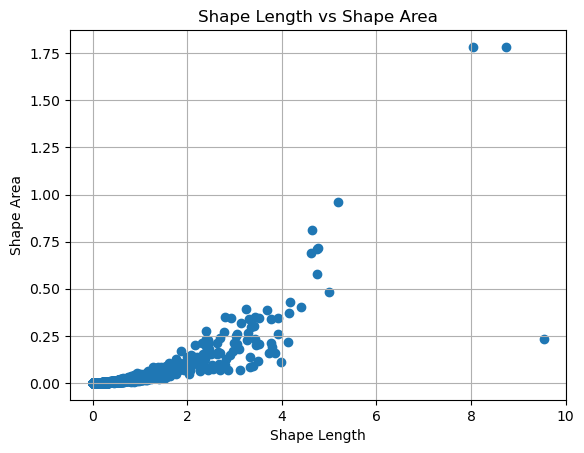

In [14]:
# Plot
plt.scatter(ejscreen.shape_length, ejscreen.shape_area)
plt.xlabel('Shape Length')
plt.ylabel('Shape Area')
plt.title('Shape Length vs Shape Area')
plt.grid(True)
plt.show()

<Axes: >

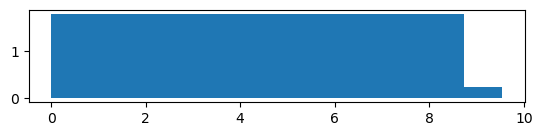

In [12]:
ejscreen_geo.crs = calenviro.crs

ejscreen_geo.plot()